In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import tensorflow as tf


# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.7,
    zoom_range=[0.9, 2.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
#    train_dir
    "/content/drive/My Drive/lecture/l_d/p6/art_name_img",
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/val",
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/My Drive/lecture/l_d/p6/art_name_img_val_and_test/test",
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical'
)


Found 2093 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [0]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.applications import VGG16

from keras.optimizers import Adam


conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(100, 100, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

adam = Adam()

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['acc'])


history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=300,
    validation_data=validation_generator,
    validation_steps=150
)

Epoch 1/300
100/100 [==============================] - 126s 1s/step - loss: 1.7299 - acc: 0.3095 - val_loss: 1.8939 - val_acc: 0.2210
Epoch 2/300
100/100 [==============================] - 118s 1s/step - loss: 1.4392 - acc: 0.4298 - val_loss: 1.6931 - val_acc: 0.3903
Epoch 3/300
100/100 [==============================] - 118s 1s/step - loss: 1.3498 - acc: 0.4711 - val_loss: 1.5510 - val_acc: 0.3700
Epoch 4/300
100/100 [==============================] - 119s 1s/step - loss: 1.3464 - acc: 0.4753 - val_loss: 1.6352 - val_acc: 0.3437
Epoch 5/300
100/100 [==============================] - 118s 1s/step - loss: 1.3000 - acc: 0.4881 - val_loss: 1.6333 - val_acc: 0.3257
Epoch 6/300
100/100 [==============================] - 117s 1s/step - loss: 1.2996 - acc: 0.5059 - val_loss: 1.4774 - val_acc: 0.3747
Epoch 7/300
100/100 [==============================] - 117s 1s/step - loss: 1.2684 - acc: 0.5123 - val_loss: 1.4765 - val_acc: 0.3857
Epoch 8/300
100/100 [==============================] - 117s 1s

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu',
         input_shape=(150, 150, 3)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['acc'])

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

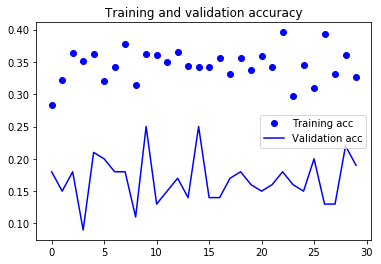

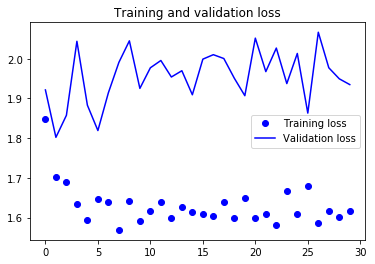

In [0]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']=

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()